In [1]:
import fiona
import geopandas as gpd
import os
import pandas as pd

In [2]:
# List available layers in the geopackage file
layers = fiona.listlayers('../../app/data/INSPIRE_AU.gpkg')
print("Available layers:", layers)

Available layers: ['AdministrativeBoundary', 'AdministrativeUnit']


In [3]:
admin_units = gpd.read_file('../../app/data/INSPIRE_AU.gpkg', layer='AdministrativeBoundary').to_crs(epsg=4326)

In [4]:
admin_units_metadata = gpd.read_file('../../app/data/INSPIRE_AU.gpkg', layer='AdministrativeUnit').to_crs(epsg=4326)

In [5]:
admin_units_metadata[['nationalLevelName', 'administeredBy', 'name']].nationalLevelName.unique()

array(['okres', 'obec', 'štát', 'kraj'], dtype=object)

In [6]:
ba_admin_unit = admin_units_metadata[(admin_units_metadata.nationalLevelName == 'kraj') & (admin_units_metadata.name == 'Bratislavský')]

In [7]:
ba1_admin_unit = admin_units_metadata[(admin_units_metadata.nationalLevelName == 'okres') & (admin_units_metadata.name == 'Bratislava II')]

<Axes: >

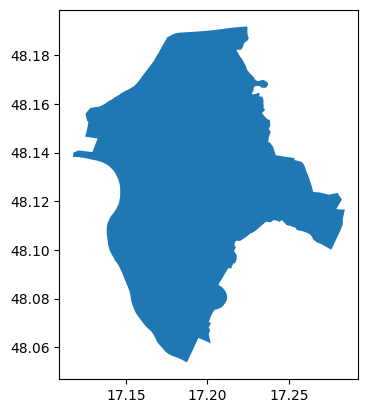

In [8]:
ba1_admin_unit.plot()

In [9]:
# ba_admin_unit.to_file('../app/data/processed/ba_admin_unit.geojson', driver='GeoJSON')

In [10]:
# ba1_admin_unit.to_file('../app/data/processed/ba2_admin_unit.geojson', driver='GeoJSON')

In [11]:
# List available layers in the geopackage file
tn_layers = fiona.listlayers('../../app/data/INSPIRE_TN.gpkg')
print("Available layers:", tn_layers)

Available layers: ['RailwayElectrification', 'RailwayLink', 'RailwayYardArea', 'NumberOfTracks', 'RoadLink', 'RoadArea', 'AerodromeType', 'RoadServiceArea', 'VerticalPosition', 'NominalTrackGauge', 'RoadWidth', 'SurfaceComposition', 'FunctionalRoadClass', 'CablewayLink', 'RunwayArea', 'FormOfWay', 'RoadServiceType', 'RailwayArea', 'RoadSurfaceCategory', 'AerodromeArea', 'ConditionOfFacility', 'Road', 'RailwayType', 'RailwayStationArea']


In [12]:
tn_layers_dict = {}
for layer in tn_layers:
    tn_layers_dict[layer] = gpd.read_file('../../app/data/INSPIRE_TN.gpkg', layer=layer).to_crs(epsg=4326)

/home/aneta/Documents/Projects/future-roots/venv/lib/python3.10/site-packages/pyogrio/raw.py:198: RuntimeWarning: Invalid content for record 1 in column endLifespanVersion: 0000-00-00T00:00:00Z
  return ogr_read(
/home/aneta/Documents/Projects/future-roots/venv/lib/python3.10/site-packages/pyogrio/raw.py:198: RuntimeWarning: Invalid content for record 1 in column endLifespanVersion: 0000-00-00T00:00:00Z
  return ogr_read(
/home/aneta/Documents/Projects/future-roots/venv/lib/python3.10/site-packages/pyogrio/raw.py:198: RuntimeWarning: Invalid content for record 1 in column endLifespanVersion: 0000-00-00T00:00:00Z
  return ogr_read(
/home/aneta/Documents/Projects/future-roots/venv/lib/python3.10/site-packages/pyogrio/raw.py:198: RuntimeWarning: Invalid content for record 1 in column endLifespanVersion: 0000-00-00T00:00:00Z
  return ogr_read(
/home/aneta/Documents/Projects/future-roots/venv/lib/python3.10/site-packages/pyogrio/raw.py:198: RuntimeWarning: Invalid content for record 1 in co

In [13]:
tn_geometries = []

In [14]:
for name, layer in tn_layers_dict.items():
    if 'geometry' in layer.columns:
        layer['layerName'] = name
        tn_geometries.append(layer[['layerName', 'geometry']])

In [15]:
tn_geometries = pd.concat(tn_geometries)

In [16]:
tn_geometries = tn_geometries[~pd.isnull(tn_geometries.geometry)]

In [30]:
tn_geometries.to_file('../../app/data/processed/tn_geometries.geojson', driver='GeoJSON')

In [17]:
ba_admin_unit_polygon = ba_admin_unit.geometry.iloc[0]

In [18]:
tn_geometries_ba = gpd.sjoin(left_df=tn_geometries[['layerName', 'geometry']], right_df=ba_admin_unit[['geometry']], how='inner', predicate='intersects')

In [19]:
tn_geometries_ba

,layerName,geometry,index_right
2001,RailwayLink,"LINESTRING (17.11785 48.15067, 17.11787 48.150...",51
2002,RailwayLink,"LINESTRING (17.12065 48.15238, 17.1206 48.1523...",51
2003,RailwayLink,"LINESTRING (17.11975 48.15168, 17.11968 48.151...",51
2004,RailwayLink,"LINESTRING (17.1086 48.1584, 17.10876 48.1584,...",51
2005,RailwayLink,"LINESTRING (17.11759 48.15221, 17.11753 48.152...",51
...,...,...,...
169,RailwayStationArea,"POLYGON ((17.17132 48.45277, 17.17138 48.45269...",51
181,RailwayStationArea,"POLYGON ((17.04824 48.18745, 17.04836 48.18732...",51
182,RailwayStationArea,"MULTIPOLYGON (((17.1221 48.16912, 17.12197 48....",51
183,RailwayStationArea,"POLYGON ((17.07241 48.17483, 17.07263 48.17472...",51


In [20]:
tn_geometries_ba[['layerName', 'geometry']].to_file('../../app/data/processed/roads_ba.geojson', driver='GeoJSON')

<Axes: >

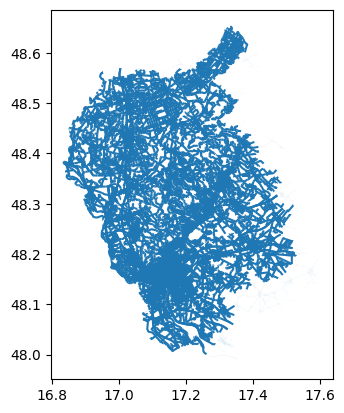

In [62]:
tn_geometries_ba.plot()

### Buildings

In [7]:
# List available layers in the geopackage file
bu_layers = fiona.listlayers('../../app/data/INSPIRE_BU.gpkg')
print("Available layers:", bu_layers)

Available layers: ['Building']


In [28]:
bu_geometries = gpd.read_file('../../app/data/INSPIRE_BU.gpkg', layer='Building')

In [29]:
bu_geometries = bu_geometries[~pd.isnull(bu_geometries.geometry)]

In [38]:
bu_geometries[['geometry']].to_crs('EPSG:4326')

,geometry
0,"POLYGON ((17.19561 48.03504, 17.19559 48.03503..."
1,"POLYGON ((17.19797 48.03996, 17.1979 48.03994,..."
2,"POLYGON ((17.19388 48.04353, 17.19384 48.04349..."
3,"POLYGON ((17.1947 48.04309, 17.19464 48.04306,..."
4,"POLYGON ((17.18558 48.04677, 17.18557 48.04675..."
...,...
3563015,"POLYGON ((17.1907 48.0452, 17.19067 48.04515, ..."
3563016,"POLYGON ((17.19288 48.04413, 17.19283 48.04409..."
3563017,"POLYGON ((17.18455 48.04698, 17.18454 48.04693..."
3563018,"POLYGON ((17.18586 48.04673, 17.18583 48.04668..."


In [41]:
ba_admin_unit = ba_admin_unit.to_crs('EPSG:4326')

In [42]:
bu_geometries = bu_geometries[['geometry']].to_crs('EPSG:4326')

In [43]:
bu_geometries_ba = gpd.sjoin(left_df=bu_geometries[['geometry']], right_df=ba_admin_unit[['geometry']], how='inner')

In [44]:
bu_geometries_ba.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 298242 entries, 0 to 3563018
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   geometry     298242 non-null  geometry
 1   index_right  298242 non-null  int64   
dtypes: geometry(1), int64(1)
memory usage: 6.8 MB


Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7ac9b82007f0>>
Traceback (most recent call last):
  File "/home/aneta/Documents/Projects/future-roots/venv/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 


KeyboardInterrupt: 

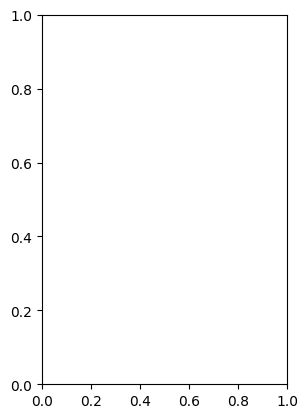

In [48]:
bu_geometries_ba.plot()

In [50]:
bu_geometries_ba.to_file('../../app/data/processed/buildings_ba.geojson', driver='GeoJSON')

In [51]:
tn_geometries_ba = gpd.read_file('../../app/data/processed/tn_geometries_ba1.geojson')

In [61]:
tn_geometries_ba.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 88390 entries, 0 to 88389
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   layerName  88390 non-null  object  
 1   geometry   88390 non-null  geometry
dtypes: geometry(1), object(1)
memory usage: 1.3+ MB


In [64]:
tn_geometries_ba_pols = tn_geometries_ba[tn_geometries_ba.geometry.apply(lambda x: x.geom_type in ['Polygon', 'MultiPolygon'])]

In [65]:
tn_geometries_ba_pols.to_file('../../app/data/processed/roads_ba_polygons.geojson', driver='GeoJSON')